In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.ticker import MultipleLocator

import nn_model.globals
from response_analyzer import ResponseAnalyzer


In [2]:
# Interactive function to update the plot
def plot_neuron_activities(example_idx, predictions, targets, neuron_start=0, neurons_to_show=10, save_fig=False):
    # Define the main 2x2 grid figure
    fig, big_axes = plt.subplots(2, 2, figsize=(15, neurons_to_show*6))
    fig.suptitle(f'Overlayed Neuron Activities for Each Layer (Example {example_idx})', y=1.02)

    # Flatten the big_axes array for easy access
    big_axes = big_axes.flatten()

    # Loop over each layer and plot in a separate subplot grid cell
    for idx, (layer_name, pred_data) in enumerate(predictions.items()):
        # Select data for the specific example
        target_data = targets[layer_name][example_idx]  # Shape: (time, neurons)
        pred_data = pred_data[example_idx]              # Shape: (time, neurons)

        # Plot neurons within the selected range
        for neuron_idx in range(neuron_start, min(neuron_start + neurons_to_show, pred_data.shape[1])):
            ax = fig.add_subplot(2 * neurons_to_show, 2, (1 + (idx % 2) + (idx // 2) * (neurons_to_show * 2) + (neuron_idx - neuron_start) * 2))
            
            sns.lineplot(x=np.arange(pred_data.shape[0]), y=pred_data[:, neuron_idx], ax=ax, label='Prediction', color='blue')
            sns.lineplot(x=np.arange(target_data.shape[0]), y=target_data[:, neuron_idx], ax=ax, label='Target', color='red')
            
            # Set title and labels
            if neuron_idx == neuron_start:
                ax.set_title(f'Layer: {layer_name}')
            ax.set_ylabel(f'Neuron {neuron_idx}')
            ax.set_ylim(-0.2, 1.2)  # Set y-axis range from 0 to 1

        # Set x-axis label only for the bottom-most neuron in each layer plot
        ax.set_xlabel('Time')

    # Adjust layout and show the final figure
    plt.tight_layout(pad=0.01)
    if save_fig:
        plt.savefig(f"plot_images/neuron_activities_example_{example_idx}.png", bbox_inches="tight")
    else:
        plt.show()


In [3]:
train_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/train_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"
test_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/test_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"

# responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-7e-06_complex_residual-False_neuron-layers-7_neuron-size-10"
responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-10_lr-7e-06_complex_residual-True_neuron-layers-9_neuron-size-10_num-hidden-time-steps-1"
# responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-7e-06_complex_residual-True_neuron-layers-5_neuron-size-10"

neuron_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/neurons/model_size_10_subset_10.pkl"
images_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/experiments/experiments_subset_10.pkl"

response_analyzer = ResponseAnalyzer(train_spikes_dir, test_spikes_dir, responses_dir, neuron_ids_path)#, images_ids_path)

In [4]:
# histogram_data = response_analyzer.create_spikes_histogram(subset=3)
# hist_counts, bin_edges = response_analyzer.create_spikes_histogram(subset=90)


In [5]:
# hist_counts, bin_edges

In [6]:
# # Plot the histogram

# # Calculate the total number of neurons (sum of all counts)
# total_neurons = hist_counts.sum()

# # Normalize the histogram to get probabilities
# hist_probabilities = hist_counts / total_neurons
# plt.figure(figsize=(10, 6))
# plt.bar(bin_edges[:-1], hist_probabilities, width=np.diff(bin_edges), align="edge", edgecolor="k")
# plt.xlabel("Number of Spikes")
# plt.ylabel("Probability of spike number")
# plt.title("Number of Neuron Spikes Distribution")
# # plt.show()
# plt.savefig(f"plot_images/num_spikes_histogram/histogram_size_{nn_model.globals.TIME_STEP}.png")

100%|██████████| 90/90 [00:04<00:00, 19.14it/s]


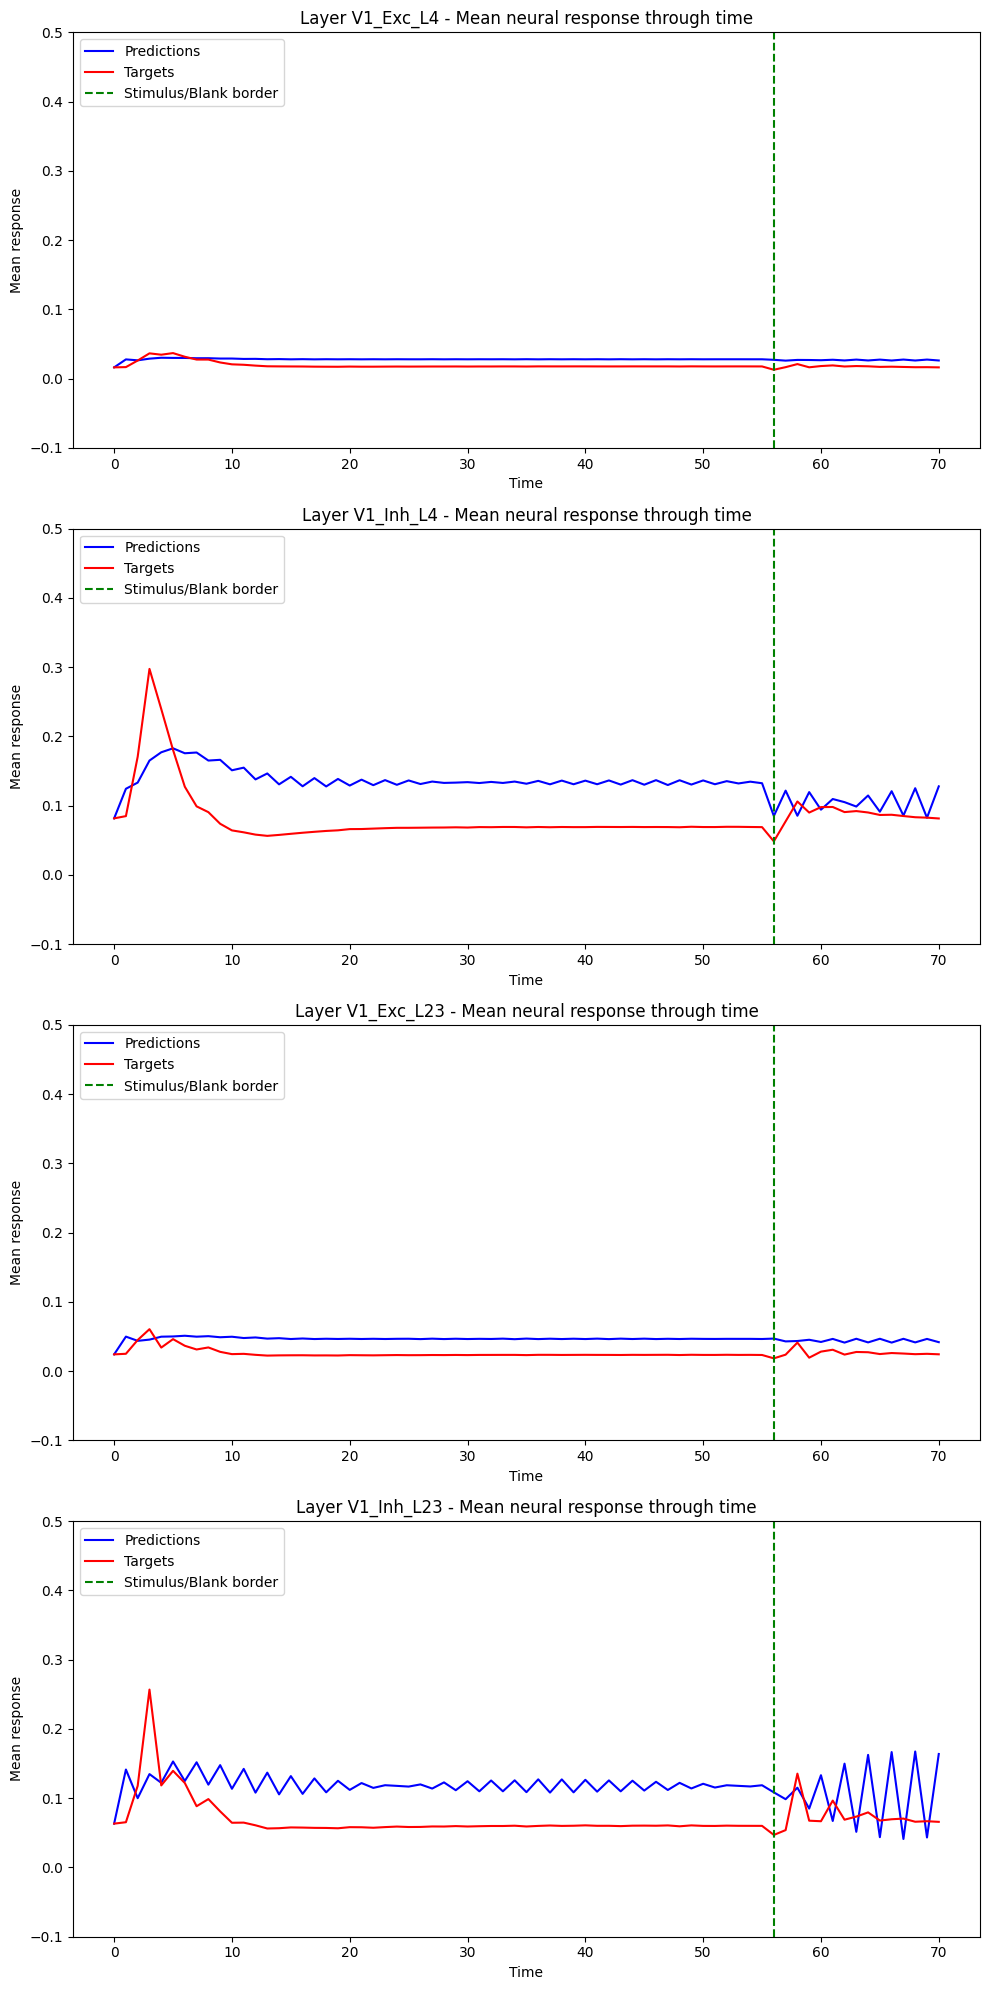

In [ ]:
response_analyzer.get_mean_from_evaluated_data()
# response_analyzer.plot_mean_layer_data(response_analyzer.mean_layer_responses, True)
response_analyzer.plot_mean_layer_data({}, True, "prediction_mean", y_range=(-0.1, 0.3),
                                    #    save_fig_path="/home/beinhaud/diplomka/mcs-source/evaluation_tools/plot_images/mean_responses/size_10_step_10_simple.png"
                                       )


# plot_predictions_vs_targets(response_analyzer.mean_layer_responses)

In [8]:
response_analyzer.get_original_data_mean_over_time(subset=2)
response_analyzer.plot_mean_layer_data({}, False, identifier="input_mean")

  0%|          | 0/90 [00:21<?, ?it/s]


KeyboardInterrupt: 